In [10]:
import numpy as np
import pandas as pd

In [11]:
from sklearn.datasets import make_regression

In [12]:
import matplotlib.pyplot as plt 

In [19]:
dataset = pd.read_csv('data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

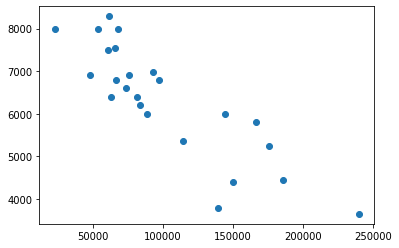

In [20]:
plt.scatter(x, y)

In [22]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(24, 1)
(24, 1)


In [87]:
X = np.hstack((x, np.ones(x.shape)))
X.shape

(24, 2)

In [88]:
X

array([[2.4000e+05, 1.0000e+00],
       [1.3980e+05, 1.0000e+00],
       [1.5050e+05, 1.0000e+00],
       [1.8553e+05, 1.0000e+00],
       [1.7600e+05, 1.0000e+00],
       [1.1480e+05, 1.0000e+00],
       [1.6680e+05, 1.0000e+00],
       [8.9000e+04, 1.0000e+00],
       [1.4450e+05, 1.0000e+00],
       [8.4000e+04, 1.0000e+00],
       [8.2029e+04, 1.0000e+00],
       [6.3060e+04, 1.0000e+00],
       [7.4000e+04, 1.0000e+00],
       [9.7500e+04, 1.0000e+00],
       [6.7000e+04, 1.0000e+00],
       [7.6025e+04, 1.0000e+00],
       [4.8235e+04, 1.0000e+00],
       [9.3000e+04, 1.0000e+00],
       [6.0949e+04, 1.0000e+00],
       [6.5674e+04, 1.0000e+00],
       [5.4000e+04, 1.0000e+00],
       [6.8500e+04, 1.0000e+00],
       [2.2899e+04, 1.0000e+00],
       [6.1789e+04, 1.0000e+00]])

In [89]:
theta = np.random.randn(2, 1)

In [90]:
theta.shape

(2, 1)

In [91]:
theta

array([[0.0379799 ],
       [1.50339267]])

In [92]:
def model(X, theta):
    return X.dot(theta)

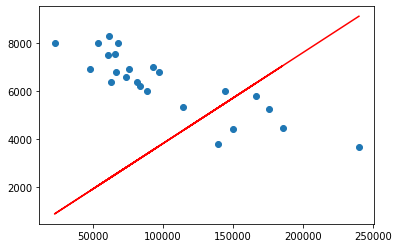

In [93]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

In [94]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m)* np.sum((model(X, theta))**2)


In [95]:
cost_function(X, y, theta)

9290505.819895523

In [75]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [76]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
    return theta

In [77]:
theta_final = gradient_descent(X, y, theta, learning_rate=200, n_iterations=24)
theta_final

array([[-2.01126047e+297],
       [-1.57900207e+292]])

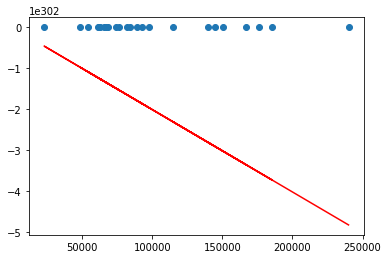

In [78]:
predictions = model(X, theta_final)
plt.scatter(x,y)
plt.plot(x, predictions, c='r')